In [59]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve,roc_auc_score

import matplotlib.pyplot as plt 

In [60]:
df = pd.read_csv("merged_data_mode.csv")

In [61]:
df.isnull().sum()

accnumber_hash                                 0
bill_dtm                                   50149
balance_fwd_mny                            50149
payments_mny                               50149
adjustments_mny                            50149
bill_total                                 50149
Remaining_bill                             50149
Payment_Day_dfr                            50149
paymentamount_avg                          50149
paymentamount_sd                           50149
paymentamount_cv                           50149
avg_event_source_faultRef_HASH_count       50149
max_clearance_time                         50149
avg_event_source_clearance_time_seconds    50149
extragb_gb_tot_avg                         50149
extragb_event_count_avg                    50149
extragb_cost_tot_avg                       50149
extragb_gb_tot_cv                          50149
extragb_cost_tot_cv                        50149
churn_status                                 106
dtype: int64

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158423 entries, 0 to 158422
Data columns (total 20 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   accnumber_hash                           158423 non-null  object 
 1   bill_dtm                                 108274 non-null  float64
 2   balance_fwd_mny                          108274 non-null  float64
 3   payments_mny                             108274 non-null  float64
 4   adjustments_mny                          108274 non-null  float64
 5   bill_total                               108274 non-null  float64
 6   Remaining_bill                           108274 non-null  float64
 7   Payment_Day_dfr                          108274 non-null  float64
 8   paymentamount_avg                        108274 non-null  float64
 9   paymentamount_sd                         108274 non-null  float64
 10  paymentamount_cv                

In [63]:
df.dropna(subset=["bill_dtm","balance_fwd_mny","payments_mny","bill_total","adjustments_mny","Remaining_bill","Payment_Day_dfr","paymentamount_avg","paymentamount_sd","paymentamount_cv","avg_event_source_faultRef_HASH_count","max_clearance_time","avg_event_source_clearance_time_seconds","extragb_gb_tot_avg","extragb_event_count_avg","extragb_cost_tot_avg","extragb_gb_tot_cv","extragb_cost_tot_cv","churn_status"], inplace=True)

In [64]:
df.shape

(108168, 20)

# Random Forest Classifier 

In [65]:
target = df.churn_status

In [66]:
inputs = df.drop(['churn_status','accnumber_hash'],axis = 'columns')
inputs.head(4)

,bill_dtm,balance_fwd_mny,payments_mny,adjustments_mny,bill_total,Remaining_bill,Payment_Day_dfr,paymentamount_avg,paymentamount_sd,paymentamount_cv,avg_event_source_faultRef_HASH_count,max_clearance_time,avg_event_source_clearance_time_seconds,extragb_gb_tot_avg,extragb_event_count_avg,extragb_cost_tot_avg,extragb_gb_tot_cv,extragb_cost_tot_cv
0,202205.0,-22.23,0.00,0.0,0.0,1.0,1.0,2800.0,737.425827,0.263366,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
1,202206.0,68.63,0.00,0.0,0.0,2.0,1.0,3200.0,737.425827,0.230446,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000
2,202206.0,-120.19,0.00,0.0,0.0,1.0,1.0,5704.0,737.425827,0.129282,0.0,0.0,0.0,20.0,1.0,1500.0,0.208958,0.236621
3,202205.0,421.22,2346.83,0.0,0.0,3.0,1.0,2166.0,737.425827,0.340455,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000


In [67]:
from sklearn.model_selection import train_test_split

In [68]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(inputs,target,test_size=0.2)

In [69]:
len(X_train1)

86534

In [70]:
len(X_test1)

21634

In [71]:
from sklearn.ensemble import RandomForestClassifier
model1 = RandomForestClassifier(n_estimators=150,
                               max_features='auto',
                               min_samples_leaf=1,
                               oob_score=True,
                               n_jobs=1,
                               bootstrap=True,
                               criterion='gini')
model1.fit(X_train1, y_train1)

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


RandomForestClassifier(max_features='auto', n_estimators=150, n_jobs=1,
                       oob_score=True)

In [72]:
model1.score(X_test1,y_test1)

0.9115281501340483

In [73]:
y_pred1 = model1.predict(X_test1)

In [74]:
print(classification_report(y_test1, y_pred1, target_names = ["0","1"]))
cm1 = confusion_matrix(y_test1,y_pred1)
print(cm1)

              precision    recall  f1-score   support

           0       0.92      0.98      0.95     18295
           1       0.82      0.55      0.66      3339

    accuracy                           0.91     21634
   macro avg       0.87      0.76      0.80     21634
weighted avg       0.91      0.91      0.90     21634

[[17887   408]
 [ 1506  1833]]


Text(42.0, 0.5, 'Truth')

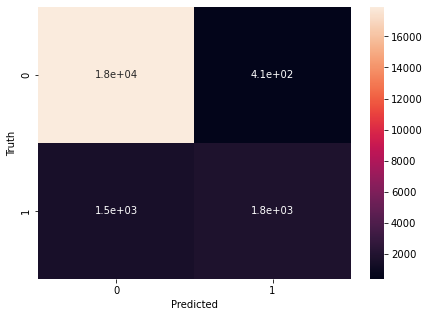

In [75]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm1, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [76]:
y_score1 = model1.predict_proba(X_test1)[:,1]
false_positive_rate1, true_positive_rate1, threshold = roc_curve(y_test1,y_score1)
print('ROC_AUC_score for Random Forest: ', roc_auc_score(y_test1,y_score1))

ROC_AUC_score for Random Forest:  0.8818809581514104


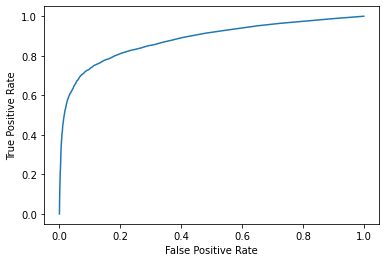

In [77]:
plt.plot(false_positive_rate1, true_positive_rate1)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [78]:
from sklearn.ensemble import RandomForestClassifier 

model = RandomForestClassifier()
model.fit(X_train1, y_train1)
importances = pd.DataFrame(data={
    'Attribute':X_train1.columns,
    'Importance':model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

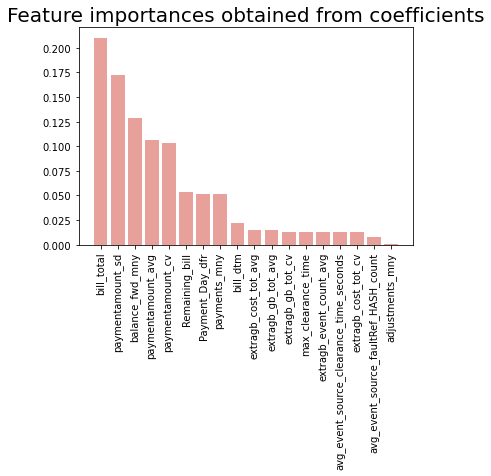

In [79]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color = '#E8A09A')
plt.title('Feature importances obtained from coefficients',size=20)
plt.xticks(rotation='vertical')
plt.show()

# Decision Tree Classifier 

In [80]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(inputs,target,test_size=0.2)

In [81]:
from sklearn import tree
model2 = tree.DecisionTreeClassifier()

In [82]:
model2.fit(X_train2,y_train2)

DecisionTreeClassifier()

In [83]:
model2.score(X_test2,y_test2)

0.8588333179254877

In [84]:
y_pred2 = model2.predict(X_test2)

In [85]:
print(classification_report(y_test2, y_pred2, target_names = ["0","1"]))
cm2 = confusion_matrix(y_test2,y_pred2)
print(cm2)

              precision    recall  f1-score   support

           0       0.92      0.91      0.92     18321
           1       0.54      0.58      0.56      3313

    accuracy                           0.86     21634
   macro avg       0.73      0.74      0.74     21634
weighted avg       0.86      0.86      0.86     21634

[[16672  1649]
 [ 1405  1908]]


Text(42.0, 0.5, 'Truth')

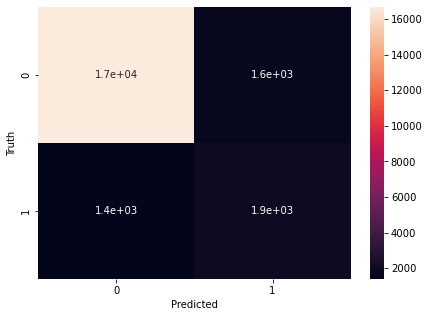

In [86]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm2, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [87]:
y_score2 = model2.predict_proba(X_test2)[:,1]
false_positive_rate2, true_positive_rate2, threshold = roc_curve(y_test2,y_score2)
print('ROC_AUC_score for Decision Tree: ', roc_auc_score(y_test2,y_score2))

ROC_AUC_score for Decision Tree:  0.7422604479761454


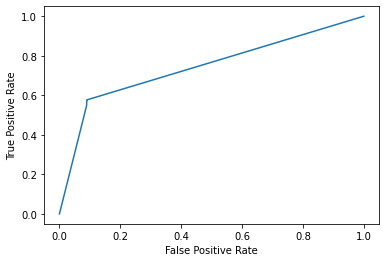

In [88]:
plt.plot(false_positive_rate2, true_positive_rate2)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [89]:
from sklearn.tree import DecisionTreeClassifier 

model = DecisionTreeClassifier()
model.fit(X_train2, y_train2)
importances = pd.DataFrame(data={
    'Attribute':X_train2.columns,
    'Importance':model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

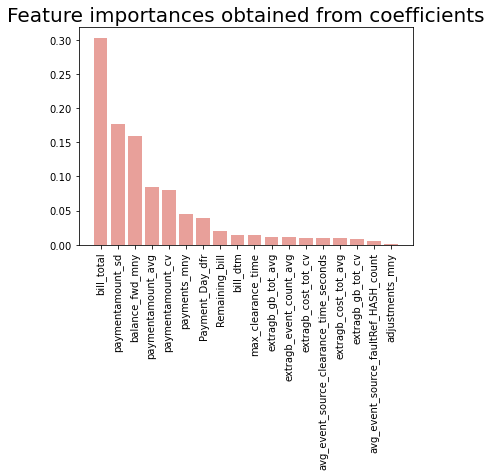

In [90]:
plt.bar(x=importances['Attribute'], height=importances['Importance'], color = '#E8A09A')
plt.title('Feature importances obtained from coefficients',size=20)
plt.xticks(rotation='vertical')
plt.show()

# KNN Classifier

In [91]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(inputs,target,test_size=0.2)

In [92]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [93]:
knn.fit(X_train3, y_train3)

KNeighborsClassifier(n_neighbors=10)

In [94]:
knn.score(X_test3, y_test3)

0.8890172876028474

In [95]:
y_pred3 = knn.predict(X_test3)

In [96]:
print(classification_report(y_test3, y_pred3, target_names = ["0","1"]))
cm3 = confusion_matrix(y_test3,y_pred3)
print(cm3)

              precision    recall  f1-score   support

           0       0.90      0.97      0.94     18402
           1       0.72      0.42      0.53      3232

    accuracy                           0.89     21634
   macro avg       0.81      0.70      0.73     21634
weighted avg       0.88      0.89      0.88     21634

[[17879   523]
 [ 1878  1354]]


Text(42.0, 0.5, 'Truth')

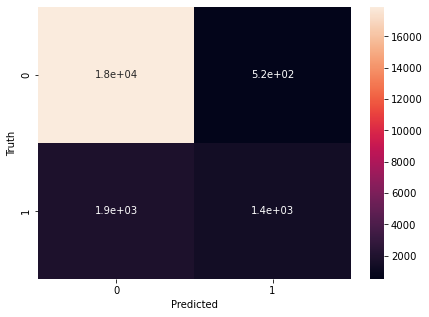

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm3, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [98]:
y_score3 = knn.predict_proba(X_test3)[:,1]
false_positive_rate3, true_positive_rate3, threshold = roc_curve(y_test3,y_score3)
print('ROC_AUC_score for Decision Tree: ', roc_auc_score(y_test3,y_score3))

ROC_AUC_score for Decision Tree:  0.8117900577961285


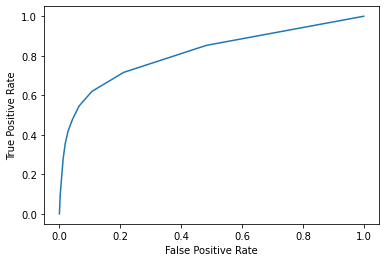

In [99]:
plt.plot(false_positive_rate3, true_positive_rate3)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Naive Bayes Classifier

In [100]:
X_train4, X_test4, y_train4, y_test4 = train_test_split(inputs,target,test_size=0.2)

In [101]:
from sklearn.naive_bayes import GaussianNB

In [102]:
nb_classifier = GaussianNB()

In [103]:
nb_classifier.fit(X_train4, y_train4)

GaussianNB()

In [104]:
y_pred4 = nb_classifier.predict(X_test4)

In [105]:
print(classification_report(y_test4, y_pred4, target_names = ["0","1"]))
cm4 = confusion_matrix(y_test4,y_pred4)
print(cm4)

              precision    recall  f1-score   support

           0       0.85      0.94      0.90     18324
           1       0.24      0.10      0.14      3310

    accuracy                           0.81     21634
   macro avg       0.55      0.52      0.52     21634
weighted avg       0.76      0.81      0.78     21634

[[17264  1060]
 [ 2974   336]]


Text(42.0, 0.5, 'Truth')

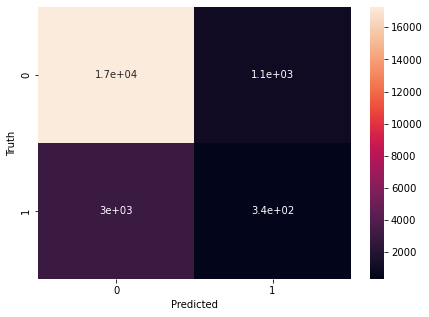

In [106]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm4, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [107]:
y_score4 = nb_classifier.predict_proba(X_test4)[:,1]
false_positive_rate4, true_positive_rate4, threshold = roc_curve(y_test4,y_score4)
print('ROC_AUC_score for Decision Tree: ', roc_auc_score(y_test4,y_score4))

ROC_AUC_score for Decision Tree:  0.6690562242838046


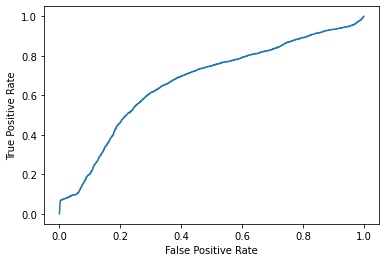

In [108]:
plt.plot(false_positive_rate4, true_positive_rate4)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# XGB Classifier 

In [109]:
X_train5, X_test5, y_train5, y_test5 = train_test_split(inputs,target,test_size=0.2)

In [110]:
from xgboost import XGBClassifier

xgbc = XGBClassifier()
xgbc.fit(X_train5,y_train5) 

# predict the results
y_pred5 = xgbc.predict(X_test5)

In [111]:
print(classification_report(y_test5, y_pred5, target_names = ["0","1"]))
cm5 = confusion_matrix(y_test5,y_pred5)
print(cm5)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     18293
           1       0.80      0.57      0.67      3341

    accuracy                           0.91     21634
   macro avg       0.86      0.77      0.81     21634
weighted avg       0.91      0.91      0.91     21634

[[17815   478]
 [ 1421  1920]]


Text(42.0, 0.5, 'Truth')

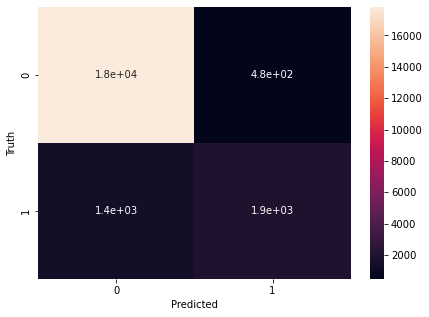

In [112]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm5, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [113]:
y_score5 = xgbc.predict_proba(X_test5)[:,1]
false_positive_rate5, true_positive_rate5, threshold = roc_curve(y_test5,y_score5)
print('ROC_AUC_score for Decision Tree: ', roc_auc_score(y_test5,y_score5))

ROC_AUC_score for Decision Tree:  0.8934340319184642


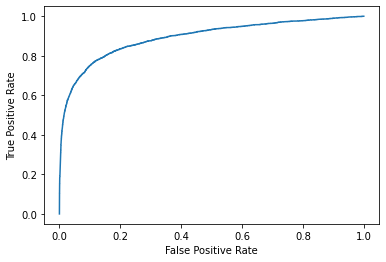

In [114]:
plt.plot(false_positive_rate5, true_positive_rate5)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Gradient Boosting Classifier

In [115]:
from sklearn.ensemble import GradientBoostingClassifier

In [116]:
X_train6, X_test6, y_train6, y_test6 = train_test_split(inputs,target,test_size=0.2)

In [117]:
model_GBC = GradientBoostingClassifier(n_estimators=100,learning_rate=0.1,random_state=42)

In [118]:
model_GBC.fit(X_train6,y_train6)

GradientBoostingClassifier(random_state=42)

In [119]:
# predict the results
y_pred6 = model_GBC.predict(X_test6)

In [120]:
print(classification_report(y_test6, y_pred6, target_names = ["0","1"]))
cm6 = confusion_matrix(y_test6,y_pred6)
print(cm6)

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     18374
           1       0.77      0.53      0.63      3260

    accuracy                           0.91     21634
   macro avg       0.85      0.75      0.79     21634
weighted avg       0.90      0.91      0.90     21634

[[17861   513]
 [ 1535  1725]]


Text(42.0, 0.5, 'Truth')

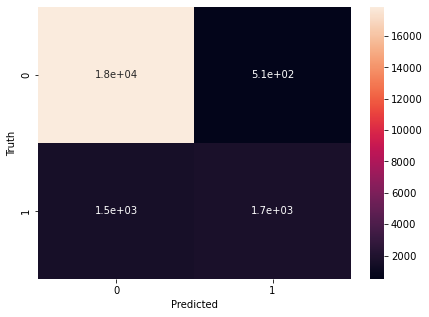

In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm6, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [122]:
y_score6 = model_GBC.predict_proba(X_test6)[:,1]
false_positive_rate6, true_positive_rate6, threshold = roc_curve(y_test6,y_score6)
print('ROC_AUC_score for Decision Tree: ', roc_auc_score(y_test6,y_score6))

ROC_AUC_score for Decision Tree:  0.8775064341383965


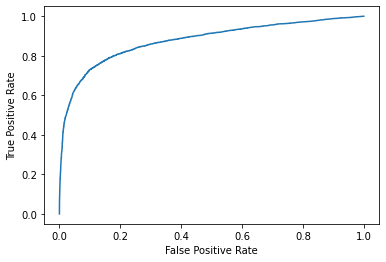

In [123]:
plt.plot(false_positive_rate6, true_positive_rate6)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# LGBM Classifier 

In [124]:
X_train7, X_test7, y_train7, y_test7 = train_test_split(inputs,target,test_size=0.2)

In [125]:
#!pip install lightgbm

In [126]:
import lightgbm as lgb

In [127]:
model_lgbm = lgb.LGBMClassifier()

In [128]:
model_lgbm.fit(X_train7,y_train7)

LGBMClassifier()

In [129]:
# predict the results
y_pred7 = model_lgbm.predict(X_test7)

In [130]:
print(classification_report(y_test7, y_pred7, target_names = ["0","1"]))
cm7 = confusion_matrix(y_test7,y_pred7)
print(cm7)

              precision    recall  f1-score   support

           0       0.93      0.97      0.95     18362
           1       0.79      0.56      0.66      3272

    accuracy                           0.91     21634
   macro avg       0.86      0.77      0.80     21634
weighted avg       0.91      0.91      0.91     21634

[[17887   475]
 [ 1431  1841]]


Text(42.0, 0.5, 'Truth')

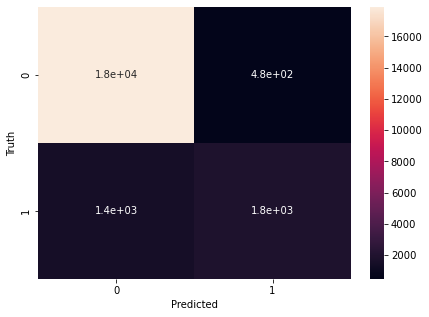

In [131]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(7,5))
sn.heatmap(cm7, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [132]:
y_score7 = model_lgbm.predict_proba(X_test7)[:,1]
false_positive_rate7, true_positive_rate7, threshold = roc_curve(y_test7,y_score7)
print('ROC_AUC_score for Decision Tree: ', roc_auc_score(y_test7,y_score7))

ROC_AUC_score for Decision Tree:  0.8882435145640687


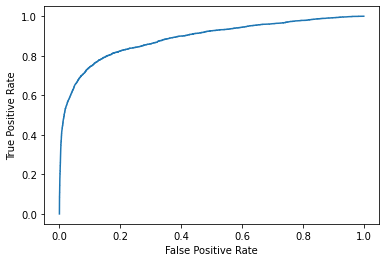

In [133]:
plt.plot(false_positive_rate7, true_positive_rate7)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()